In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.datasets import cifar10
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("Number of training images: ", len(X_train))
print("Number of testing images : ", len(X_test))
print("Size of each image       : ", len(X_train[0]), "x", len(X_train[0][0]), "x", len(X_train[0][0][0]))

170498071/170498071 [==============================] - 2s 0us/step
Number of training images:  50000
Number of testing images :  10000
Size of each image       :  32 x 32 x 3


In [3]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7


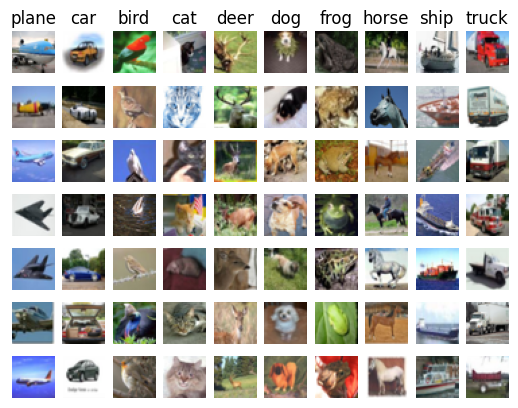

In [4]:
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

In [6]:
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train.ravel())

In [7]:
y_test_pred = neigh.predict(X_test)

In [8]:
num_correct = np.sum(y_test_pred == y_test.ravel())
accuracy = float(num_correct) / len(X_test)
print('Got %d / %d correct => accuracy: %f' % (num_correct, len(X_test), accuracy))

Got 3398 / 10000 correct => accuracy: 0.339800


In [9]:
cm = confusion_matrix(y_test_pred, y_test.ravel())

In [10]:
print(classification_report(y_test_pred, y_test.ravel()))

              precision    recall  f1-score   support

           0       0.56      0.35      0.43      1618
           1       0.23      0.63      0.34       366
           2       0.45      0.22      0.30      2055
           3       0.22      0.29      0.25       750
           4       0.46      0.25      0.32      1873
           5       0.22      0.41      0.29       538
           6       0.26      0.35      0.30       745
           7       0.22      0.69      0.33       311
           8       0.64      0.41      0.50      1561
           9       0.13      0.72      0.22       183

    accuracy                           0.34     10000
   macro avg       0.34      0.43      0.33     10000
weighted avg       0.44      0.34      0.35     10000



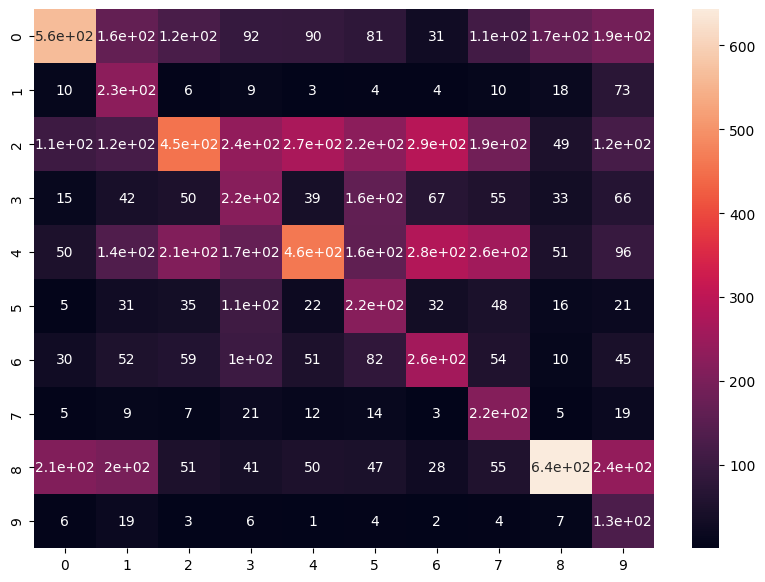

In [11]:
df_cm = pd.DataFrame(cm, index=[i for i in range(0, 10)], columns=[i for i in range(0, 10)])
plt.figure(figsize=(10, 7))
sn.heatmap(df_cm, annot=True)
plt.show()